<a href="https://colab.research.google.com/github/JosegSuarezb/Aprendizaje-supervisado/blob/main/Reto_1_Modelos_cl%C3%A1sicos_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de daños por incendios forestales en California

## Objetivo

Desarrollar un modelo de aprendizaje supervisado para predecir los daños causados por incendios forestales en California, aplicando técnicas de regresión y codificación de variables categóricas.

## Instrucciones

###  I. Carga de datos

1. Descarga el conjunto de datos desde el siguiente enlace: [California Wildfire Damage](https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025).
2. Carga los datos en un DataFrame de Pandas.

### II. Exploración y preprocesamiento de datos

1. Revisa las primeras filas del DataFrame y utiliza métodos como `info()` y `describe()` para entender la estructura y resumen estadístico de los datos.
2. Identifica columnas con valores nulos y decide cómo manejarlos (por ejemplo, eliminación o imputación).
3. Asegúrate de que las columnas tengan los tipos de datos adecuados (por ejemplo, fechas como datetime).

### III. Codificación de Variables Categóricas

---


 En muchos conjuntos de datos, las variables categóricas deben transformarse en valores numéricos para que los modelos de Machine Learning puedan procesarlas. Existen dos técnicas principales:

#### 1. Label Encoding
 El **Label Encoding** convierte cada categoría en un número entero único. Se usa cuando las categorías tienen un **orden implícito**.

 **Ejemplo:**

 | Cause       | Label Encoding |
 |------------|---------------|
| Lightning  | 0             |
| Human      | 1             |
 | Unknown    | 2             |

 **Código en Python con `LabelEncoder`:**
 ```python
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 df["Cause_Label"] = label_encoder.fit_transform(df["Cause"])
 ```
**Nota:** Este método **no es ideal** para variables sin un orden, ya que el modelo puede interpretar erróneamente que una ategoría es "mayor" que otra.

 ---

#### 2.  One-Hot Encoding
 El **One-Hot Encoding** crea una columna binaria (0 o 1) para cada categoría, evitando la asignación de valores ordinales incorrectos.

 **Ejemplo:**

 | Location   | Location_LA | Location_SF | Location_Sacramento |
 |------------|------------|-------------|---------------------|
 | LA         | 1          | 0           | 0                   |
 | SF         | 0          | 1           | 0                   |
 | Sacramento | 0          | 0           | 1                   |

 **Código en Python con `pd.get_dummies()`:**
 ```python
 df = pd.get_dummies(df, columns=["Location"], drop_first=True)
 ```
 **Ventaja:** Evita la falsa interpretación de una jerarquía en los datos.
**Desventaja:** Puede generar muchas columnas si hay demasiadas categorías.

 **¿Cuándo usar cada técnica?**
 - **Usa Label Encoding** si la variable tiene un orden inherente (por ejemplo, "Bajo", "Medio", "Alto").
 - **Usa One-Hot Encoding** si la variable no tiene un orden y hay pocas categorías únicas.
 ---

Label Encoding: Aplica Label Encoding a variables categóricas ordinales, si las hay.
One-Hot Encoding: Aplica One-Hot Encoding a variables categóricas nominales. Puedes utilizar pd.get_dummies() de Pandas para este propósito.

Nota: La codificación de variables categóricas es esencial para que los modelos de regresión puedan procesar estas variables.

### IV. Selección de características (features)

1. Selecciona las variables independientes (features) que consideres relevantes para predecir los daños causados por los incendios.
2. Define la variable dependiente (target), que en este caso sería la medida de daño causado por el incendio.

### V. División de los datos

Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split de Scikit-Learn.

### VI. Entrenamiento de modelos

1. Regresión Lineal: entrena un modelo de regresión lineal con los datos de entrenamiento.
2. Regresión No Lineal: entrena un modelo de regresión no lineal, como una regresión polinómica o un modelo de árbol de decisión.

### VII. Evaluación de modelos

1. Evalúa el rendimiento de ambos modelos utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
2. Compara los resultados y determina qué modelo se desempeña mejor en este contexto.

### VIII. Conclusión

1. Resume los hallazgos del análisis.
2. Discute las posibles razones por las cuales un modelo podría superar al otro.



In [1]:
# Cargamos las librerías necesarias
import numpy as np #librería para manejo numérico
import pandas as pd #librería para gestión de tablas
import matplotlib.pyplot as plt #librería para gráficos simples

#para carga automatica de los datos
from google.colab import drive  #cargar datos desde el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargamos el archivo
data=pd.read_excel('/content/drive/MyDrive/Aprendizaje supervisado/California Wildfire Damage.xlsx')
data.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


Exploracion de los datos

In [3]:
data.describe()

,Date,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $)
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2019-02-26 07:26:24,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2396.099300
min,2014-02-03 00:00:00,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.590000
25%,2016-05-06 06:00:00,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1175.195000
50%,2019-04-02 00:00:00,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.530000
75%,2021-10-06 00:00:00,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3662.110000
max,2023-12-08 00:00:00,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.990000
std,NaN,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.439422


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [5]:
data.isna().sum() #se realiza este codigo para identificar si hay datos faltantes

,0
Incident_ID,0
Date,0
Location,0
Area_Burned (Acres),0
Homes_Destroyed,0
Businesses_Destroyed,0
Vehicles_Damaged,0
Injuries,0
Fatalities,0
Estimated_Financial_Loss (Million $),0


Como no se encontraron valores nulo o faltantes no se considera la eliminacion o imputacion datos

In [6]:
data.dtypes #para identificar el tipo de dato actual

,0
Incident_ID,object
Date,datetime64[ns]
Location,object
Area_Burned (Acres),int64
Homes_Destroyed,int64
Businesses_Destroyed,int64
Vehicles_Damaged,int64
Injuries,int64
Fatalities,int64
Estimated_Financial_Loss (Million $),float64


No es necesario transformar el date a datetime porque ya se encuentra ese dato en ese formato

CODIFICACION VARIABLES CATEGORICAS

In [7]:
#Se convierten las variables categoricas location y cause a numericas mediante el metodo
#ONE-HOT Encoding ya que estos no tienen un orden
data = pd.get_dummies(data, columns=["Location", "Cause"], drop_first=True)


SELECCION DE CARACTERISICAS

In [8]:
data = data.drop('Incident_ID', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  100 non-null    datetime64[ns]
 1   Area_Burned (Acres)                   100 non-null    int64         
 2   Homes_Destroyed                       100 non-null    int64         
 3   Businesses_Destroyed                  100 non-null    int64         
 4   Vehicles_Damaged                      100 non-null    int64         
 5   Injuries                              100 non-null    int64         
 6   Fatalities                            100 non-null    int64         
 7   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 8   Location_Los Angeles County           100 non-null    bool          
 9   Location_Mendocino County             100 non-null    bool          
 10  Loc

In [10]:
bool_cols = data.select_dtypes(include=bool).columns  # Obtener nombres de columnas booleanas
data[bool_cols] = data[bool_cols].astype(int)  # Convertir a int64

In [11]:
data.head()

,Date,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Location_Los Angeles County,Location_Mendocino County,Location_Napa Valley,Location_Orange County,Location_Riverside County,Location_San Diego County,Location_Santa Barbara County,Location_Shasta County,Location_Sonoma County,Cause_Lightning,Cause_Unknown
0,2020-11-22,14048,763,474,235,70,19,2270.57,0,0,0,0,0,0,0,0,1,1,0
1,2021-09-23,33667,1633,4,263,100,2,1381.14,0,0,0,0,0,0,0,0,1,1,0
2,2022-02-10,26394,915,291,31,50,6,2421.96,0,0,0,0,0,0,0,1,0,0,0
3,2021-05-17,20004,1220,128,34,28,0,3964.16,0,0,0,0,0,0,0,0,1,0,1
4,2021-09-22,40320,794,469,147,0,15,1800.09,0,0,0,0,0,0,0,0,1,0,1


In [12]:
data['Date'] = pd.to_datetime(data['Date'])

# Extraer día, mes y año
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Eliminar la columna original 'Date' si ya no la necesitas
data = data.drop('Date', axis=1)

In [13]:
# Seleccionar columnas numéricas y calcular correlación
correlation_matrix = data.corr()

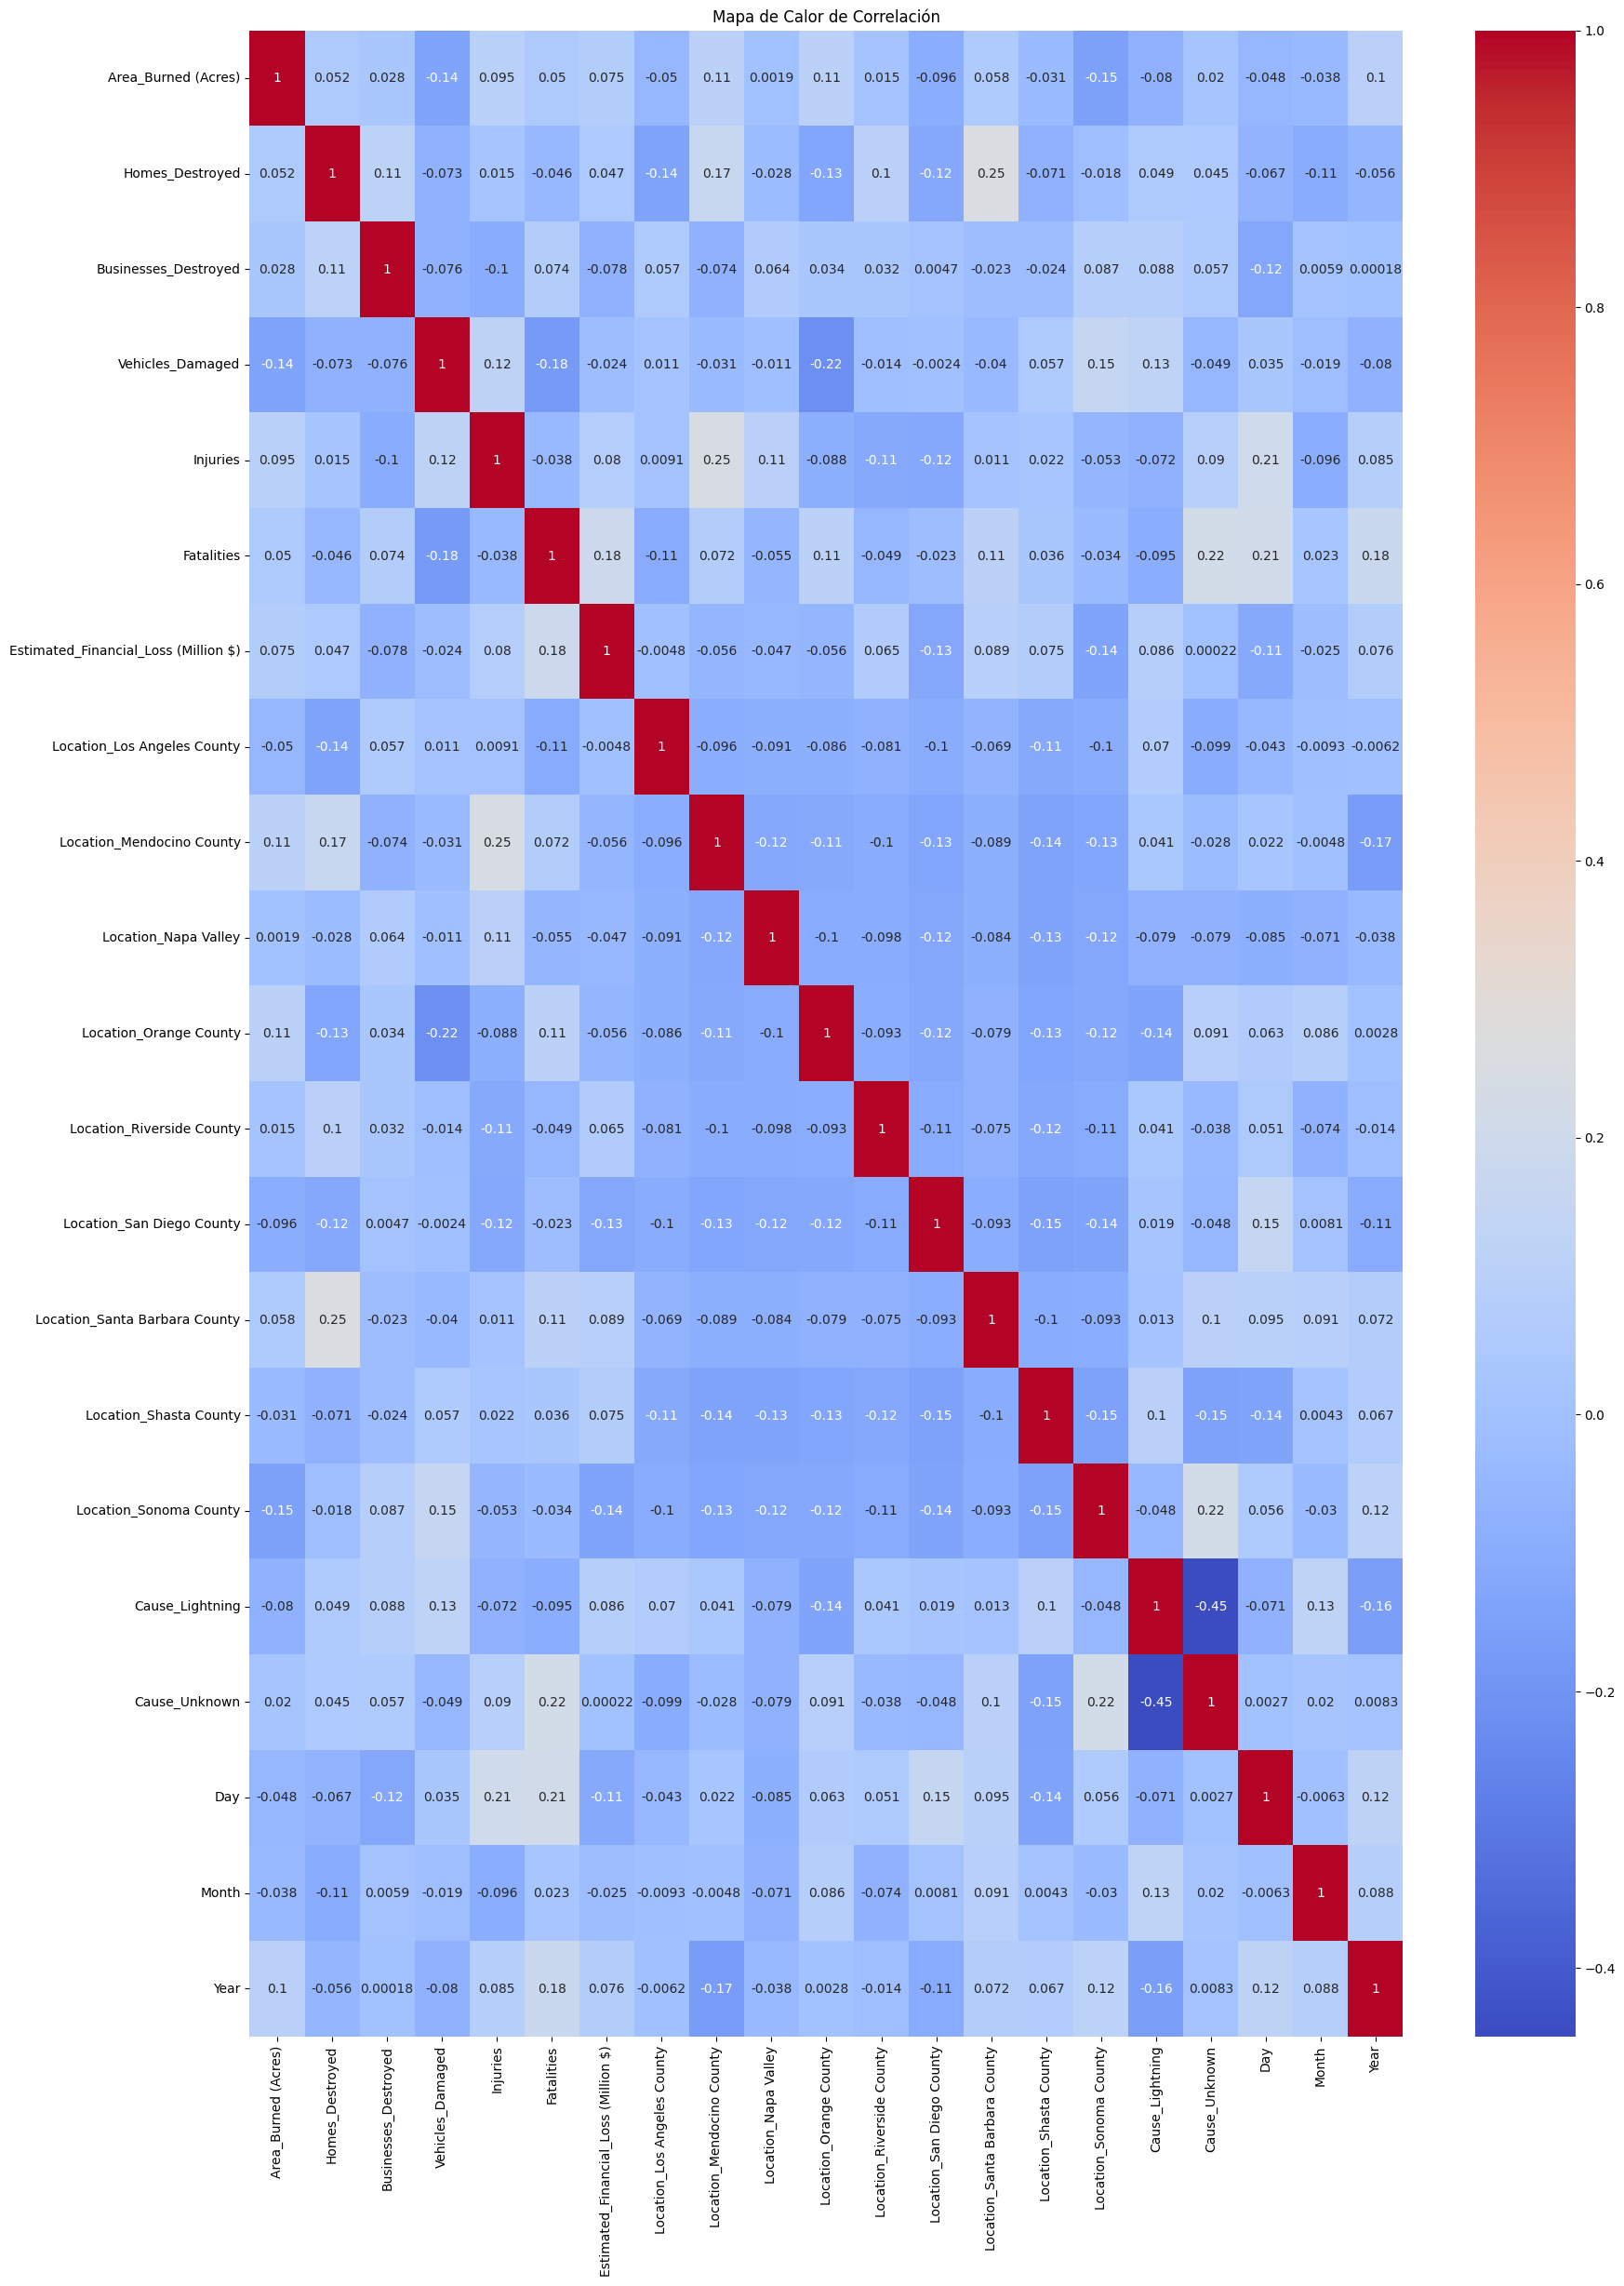

In [14]:
import seaborn as sns
plt.figure(figsize=(20, 28))  # Ajustar el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [15]:
#seleccionamos las caracteristicas
features = data[['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Cause_Lightning', 'Cause_Unknown']]
target = data['Estimated_Financial_Loss (Million $)']

x=features
y=target

Division de los datos

In [16]:
from sklearn.model_selection import train_test_split
#particionamos los datos
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Imprime las dimensiones de los conjuntos para verificar
print("Dimensiones del conjunto de entrenamiento (X):", x_train.shape)
print("Dimensiones del conjunto de prueba (X):", x_test.shape)
print("Dimensiones del conjunto de entrenamiento (y):", y_train.shape)
print("Dimensiones del conjunto de prueba (y):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X): (80, 8)
Dimensiones del conjunto de prueba (X): (20, 8)
Dimensiones del conjunto de entrenamiento (y): (80,)
Dimensiones del conjunto de prueba (y): (20,)


Entrenamiento de los modelos

In [17]:
from sklearn.linear_model import LinearRegression

# 1. Regresión Lineal
#Regresion lineal
from sklearn.linear_model import LinearRegression #importamos el modelo
modelo = LinearRegression(fit_intercept = True) #instanciamos el modelo
linear_model = modelo.fit(x_train,y_train) #entrenamos el modelo
linear_model.score(x_train,y_train) #evaluamos el modelo

0.0936221155697099

In [18]:
#regresion no lineal
from sklearn.preprocessing import PolynomialFeatures
# 2. Regresión No Lineal
polinomio = PolynomialFeatures(degree = 4, include_bias = True)
x_p = polinomio.fit_transform(x)

x_train_p, x_test_p, y_train, y_test = train_test_split(x_p, y, test_size=0.2, random_state=42)

modelo_polinomio = LinearRegression()
modelo_polinomio.fit(x_train_p, y_train)
modelo_polinomio = LinearRegression()

#entrenamos y calculamos la metrica de desempeño sobre X
modelo_polinomio.fit(x_p, y)
modelo_polinomio.score(x_p, y)


1.0

In [19]:
from sklearn.pipeline import Pipeline
#primero instanciamos el pipeline
pipe = Pipeline([('polinomio',PolynomialFeatures(include_bias=True)),('modelo',LinearRegression())])

#segundo: establecemos los posibles valores que puede tomar el grado del polinomio
grados = range(2,10)

#creamos listas vacias para almacenar temporalmente los resultados
score = []

for grado in grados:
  score.append(pipe.set_params(polinomio__degree=grado).fit(features,target).score(features,target))

In [20]:
score

[0.344128100351642,
 0.9999999999999966,
 1.0,
 0.9999999999999998,
 0.9629196569607176,
 0.8935148477694089,
 0.775651902358768,
 0.6603717622965198]

Evaluacion de los modelos

In [21]:
y_pred = linear_model.predict(x)
linear_model.score(x, y)

0.06454445667706599

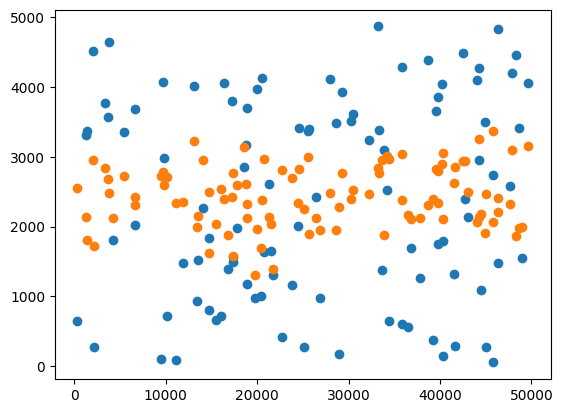

In [22]:
y_pred = linear_model.predict(x)
plt.scatter(x.iloc[:, 0], y);
plt.scatter(x.iloc[:, 0], y_pred);

In [23]:
from sklearn.model_selection import train_test_split

#particionamos los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#comprobamos los tamaños del train y del test
x_train.shape, x_test.shape

((70, 8), (30, 8))

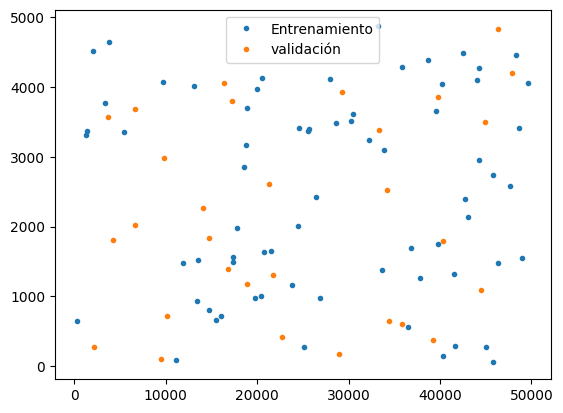

In [24]:
plt.plot(x_train.iloc[:, 0], y_train, '.', label = 'Entrenamiento')
plt.plot(x_test.iloc[:, 0], y_test, '.', label = 'validación')
plt.legend()
plt.show()

In [25]:
#creamos el pipeline para incorporar el test

#intanciamos el pipeline
pipe = Pipeline([('polinomio', PolynomialFeatures(include_bias = True)),
                 ('modelo', LinearRegression())])

#establecemos los posibles valores del hiperparametro (los que puede tomar el grado del polinomio)
grados = range(2,5)

# creamos listas vacias para almacenar temporalmente los resultados
score_train = []
score_test = []

for grado in grados:
  score_train.append(pipe.set_params(polinomio__degree = grado).fit(x, y).score(x,y))
  score_test.append(pipe.set_params(polinomio__degree = grado).fit(x, y).score(x_test,y_test))

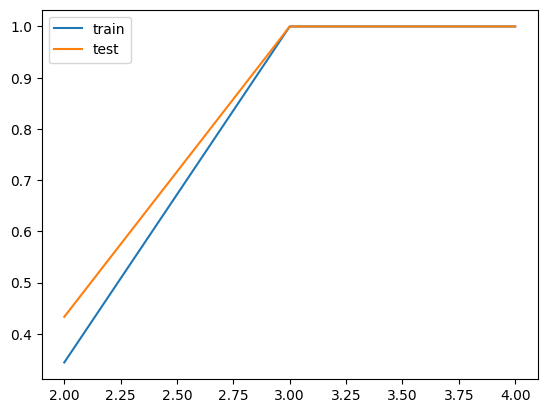

In [26]:
plt.plot(grados, score_train, label = 'train')
plt.plot(grados, score_test, label = 'test')
plt.legend()
plt.show ()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

x_test_p = polinomio.transform(x_test)  # Transformamos X_test para tener el correcto numero de features

# Predecimos en este test la variable dependiente para ambos modelos
y_pred_linear = linear_model.predict(x_test)
y_pred_poly = modelo_polinomio.predict(x_test_p)

# Evaluamos el modelo de regresion lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

# Evaluamos el modelo de regresion polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression:")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")
# 4. Comparación de los modelos
if r2_linear > r2_poly:
    print("\nEl modelo de Regresión Lineal tiene un mejor rendimiento en este contexto.")
else:
    print("\nEl modelo de Regresión No Lineal (polinomial) tiene un mejor rendimiento en este contexto.")


Linear Regression:
Mean Squared Error (MSE): 2015016.569668675
R-squared (R2): 0.005250776919720979

Polynomial Regression:
Mean Squared Error (MSE): 1.1227396967021105e-16
R-squared (R2): 1.0

El modelo de Regresión No Lineal (polinomial) tiene un mejor rendimiento en este contexto.


**Conclusion**

1. Se realizo el analisis de la base de datos de los daños causados por los incendios forestales en California, el cual identificamos que esta base de datos no tiene datos nulos, la media de los daños en dolares fue de 2396 millones de dolares. Luego se pasaron location y cause a dummies mediante el metodo ONE-HOT ya que no tienen un orden y se transformo la fecha en dia, mes y año para luego realizar la correlacion para identificar cuales tienen mas correlacion con la variable Estimated_Financial_Loss pero cuando se colocaron las que tenian mayor correlacion para evaluar los modelos estos daban el r^2 negativo por lo que se intento poner las variables independientes las que se creia que puedan tener una mayor incidencia con la variable Estimated_Financial_Loss dando que las variables fueron: Area_Burned (Acres), Homes_Destroyed, Businesses_Destroyed, Vehicles_Damaged, Injuries, Fatalities, Cause_Lightning & Cause_Unknown. Posteriormente se realizo la division de los datos de prueba y entrenamiento dando las dimensiones de entrenamiento (x): (80,8) y de prueba (x):(20,8).
Luego se entrenaron ambos modelos tanto el lineal como el no lineal, dando el lineal un score de 0.09 y el no lineal (polinomial) con grado 4 se obtuvo perfecto un score de 1 lo cual tuvo un buen entrenamiento con ese metodo. Luego sacamos el tamaño del test y el train para luego obtener el score del train y test para observar que tanto el train y el test se estabilizan desde el grado 3 hasta el 5. Por ultimo, se empieza a predecir los datos con ambos modelos para sacar el Mean Square error (MSE) y el R2 de cada modelo y se identifico que el mejor modelo fue el modelo de Regresion no lineal (polinomial) teniendo en cuenta que el MSE dio muy cercano a 0 lo que indica que el modelo ajusta casi perfectamente los datos y que R2 dio 1 lo que indica se realizo un ajuste perfecto.

2.
**Regresion lineal**
- MSE: 2015016.56
- r2: 0.005

**Regresion no lineal (polinomica)**
- MSE: 1.12
- r2: 1

Como se puede observar el mejor modelo que puede predecir el Estimated_Financial_Loss de mejor manera seria inplementando la regresion polinomica ya que el MSE es un error casi cero lo que indica que el modelo ajusta extremadamente bien los datos de entrenamiento y el r2 que dio 1 el cual explica el 100% de la variabilidad de los datos lo que podria indicar una señal de sobreajuste lo que indica que el modelo puede haber aprendido demasiado bien los datos de entrenamiento. En comparacion con el modelo de regresion lineal que el MSE dio un valor muy alto lo que indica que las predicciones estan lejos de los valores reales y que el r2 dio un valor muy cerca al cero lo que indica que el modelo casi no explica la variabilidad de los datos. Por lo tanto, el mejor modelo para realizar la prediccion seria la regresion polinomica.
